# Learning about Matching inferences in Statistics

## Used when comparing groups without strong correlation.

In [1]:
# Libraries needed

%pip install CausalInference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 861.5 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as sst
from causalinference import CausalModel

In [6]:
df = pd.read_csv("datasets/school.csv")

# df.head()

# Remove the childid column as irrelevant for the study.
df = df.iloc[:,1:]

df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


# Data analytics section

In [20]:
# Do T-Test for all numerical data between the two groups

# We don't do t-test for binary variables
numerics_list = ["number_places_lived","mom_age","dad_age","mom_score","dad_score","income"]

# Storing results

result = {}


for nls in numerics_list:
    grp1 = df.where(df.catholic ==1).dropna()[nls]
    grp2 = df.where(df.catholic ==0).dropna()[nls]

    #perform t-test
    _,p =sst.ttest_ind(grp1,grp2)
    result[nls] = p
    # print(f'For {nls} the P-Value for t-test is {p}')

# Print the dictionary results
result

# Create a dataframe using the dictionary result

ttests_data =  pd.DataFrame.from_dict(result, orient="Index")
ttests_data.columns = ["p-value"]

print(ttests_data)


                          p-value
number_places_lived  7.072609e-03
mom_age              1.359492e-22
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18
income               5.943636e-41


In [23]:
# Chi-Square for Binary variables

binary_list = ["poverty","food_stamps"]

tab1 = pd.crosstab(index=df.poverty, columns= df.catholic)
tab2 = pd.crosstab(index=df.food_stamps, columns= df.catholic)
print(sst.chi2_contingency(observed=tab1))
print(sst.chi2_contingency(observed=tab2))

Chi2ContingencyResult(statistic=69.815669888688, pvalue=6.511354893726035e-17, dof=1, expected_freq=array([[4107.85466937,  849.14533063],
       [ 391.14533063,   80.85466937]]))
Chi2ContingencyResult(statistic=30.526039319095354, pvalue=3.294152536143394e-08, dof=1, expected_freq=array([[4324.14477804,  893.85522196],
       [ 174.85522196,   36.14477804]]))


In [24]:
# To deal with the Qualitative data of race and education. We need to know whaich are the categories.

df.value_counts(df.race)

race
WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: count, dtype: int64

In [27]:
# Convert their dimension from Qualitative to Quantitative.
df["race_white"] = np.where(df["race"]=="WHITE, NON-HISPANIC",1,0)
df["race_hispanic"] = np.where((df["race"]=="HISPANIC, RACE NOT SPECIFIED") | (df["race"]=="HISPANIC, RACE SPECIFIED"),1,0)
df["race_black"] = np.where(df["race"]=="BLACK OR AFRICAN AMERICAN, NON-HISPANIC",1,0)
df["race_asian"] = np.where(df["race"]=="ASIAN",1,0)

df.head(2)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0


In [29]:
# Qualitative to Quantitiave for Education Data

df.value_counts(df["mom_education"])

mom_education
SOME COLLEGE                              1721
HIGH SCHOOL DIPLOMA/EQUIVALENT            1306
BACHELOR'S DEGREE                         1085
MASTER'S DEGREE (MA, MS)                   387
VOC/TECH PROGRAM                           294
9TH - 12TH GRADE                           222
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     170
8TH GRADE OR BELOW                         134
DOCTORATE OR PROFESSIONAL DEGREE           110
Name: count, dtype: int64

In [30]:
# Categorizing based on bachelor's degree and above.

df["dad_higher_education"] = np.where(
    (df.dad_education == "BACHELOR'S DEGREE")|
    (df.dad_education == "MASTER'S DEGREE (MA, MS)")|
    (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE")
    ,1,0
    )

df["mom_higher_education"] = np.where(
    (df.mom_education == "BACHELOR'S DEGREE")|
    (df.mom_education == "MASTER'S DEGREE (MA, MS)")|
    (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE")
    ,1,0
    )

df.head(2)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0,1,0


In [31]:
# Now remove the Quantitative Data

df_final = df.drop(columns=["race","mom_education","dad_education"])

df_final.head(2)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,1,47,45,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0
1,0,1,41,48,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0,1,0


In [35]:
# Segregating y, treat and confonders
# We take only the values because the algorithm dont expect a string i.e column title
y = df_final.score_standardized.values
treat = df_final.catholic.values
confonders = df_final.drop(columns= ["catholic","score_standardized"]).values


In [36]:
# Finding if confonders have a substantial overlap with the treatment group. [Common Support region]
import statsmodels.api as st
 # Add constant

confonders_csr = st.add_constant(confonders)

csr_model = st.Logit(treat, confonders_csr).fit()

Optimization terminated successfully.
         Current function value: 0.430983
         Iterations 8


In [37]:
probabilities = csr_model.predict(confonders_csr)


In [50]:
#Create a dataframe with treat and probabbilities using the numpy vstack api

df_prob = np.vstack([treat,probabilities]).transpose()

# Now the treated groups are either catholic (1) or not (0) and hence we need to seperate them.

non_treated = df_prob[:,0]==0
non_treated_group = df_prob[non_treated]


treated = df_prob[:,0]==1
treated_group = df_prob[treated]

/var/folders/1n/jx1cq0bx301bmmtgw78690fm0000gn/T/ipykernel_8063/1002335320.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=non_treated_group, color="red", fill= True)
/var/folders/1n/jx1cq0bx301bmmtgw78690fm0000gn/T/ipykernel_8063/1002335320.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=treated_group, palette="crest", fill= True)


<Axes: ylabel='Density'>

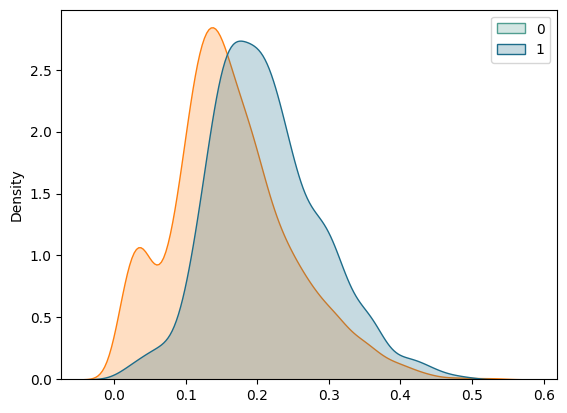

In [57]:
sns.kdeplot(data=non_treated_group, color="red", fill= True)
sns.kdeplot(data=treated_group, palette="crest", fill= True)

In [58]:
model = CausalModel(y,treat, confonders)
model.est_via_matching(bias_adj=True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.133      0.065     -2.044      0.041     -0.260     -0.005
           ATC     -0.126      0.073     -1.737      0.082     -0.268      0.016
           ATT     -0.167      0.060     -2.786      0.005     -0.284     -0.049



/Users/ujjwaljayswal/Desktop/Data Analyst/notebooks/env/lib/python3.11/site-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


In [62]:
# repeated experiments for enhanced robustness

ate ={}

for i in range(1,1000):

    # taking 1000 sample
    sample = df_final.sample(1000)

    # y, treat and confounders
    y = sample.score_standardized.values
    treat = sample.catholic.values
    confonders = sample.drop(columns= ["catholic","score_standardized"]).values

    #matching
    model = CausalModel(y,treat, confonders)
    model.est_via_matching(bias_adj=True)   

    # storing

    ate[i] = model.estimates["matching"]["ate"]



ate_data = pd.DataFrame.from_dict(ate, orient="Index")

ate_data.columns = ["ate"]

ate_data

/Users/ujjwaljayswal/Desktop/Data Analyst/notebooks/env/lib/python3.11/site-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
/Users/ujjwaljayswal/Desktop/Data Analyst/notebooks/env/lib/python3.11/site-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
/Users/ujjwaljayswal/Desktop/Data Analyst/no

,ate
1,0.066204
2,-0.115921
3,-0.083790
4,-0.115234
5,-0.174690
...,...
995,-0.095798
996,-0.197471
997,-0.153483
998,-0.101345


<Axes: >

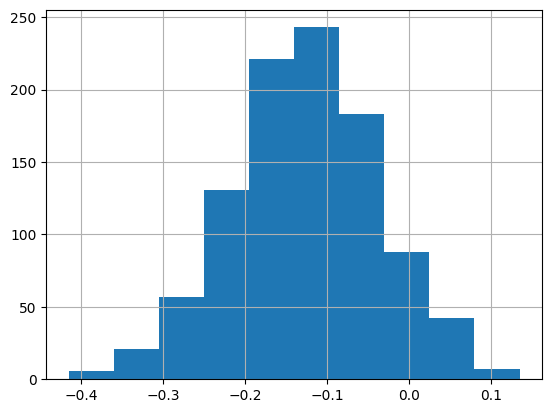

In [64]:
ate_data = pd.Series(ate)

ate_data.hist()